In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Generate synthetic time series data with a lag effect
np.random.seed(42)
time_index = pd.date_range('2023-01-01', periods=100, freq='D')
data = pd.DataFrame({'Date': time_index,
                     'X': np.random.randn(100),
                     'Y': np.random.randn(100)})

# Add lagged variables to the dataset
lag_periods = 3
for lag in range(1, lag_periods + 1):
    data[f'X_lag_{lag}'] = data['X'].shift(lag)
    data[f'Y_lag_{lag}'] = data['Y'].shift(lag)

# Drop rows with NaN values (due to lagged variables)
data.dropna(inplace=True)

In [3]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Create a regression model with time lags
X_train = train_data[['X_lag_1', 'X_lag_2', 'X_lag_3', 'Y_lag_1', 'Y_lag_2', 'Y_lag_3']]
y_train = train_data['Y']
X_test = test_data[['X_lag_1', 'X_lag_2', 'X_lag_3', 'Y_lag_1', 'Y_lag_2', 'Y_lag_3']]
y_test = test_data['Y']


In [4]:
X_train = sm.add_constant(X_train)  # Add a constant term for the intercept
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)  # Ordinary Least Squares (OLS) regression
results = model.fit()

In [5]:
# Print the regression summary
print(results.summary())

# Make predictions on the testing data
y_pred = results.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.5998
Date:                Fri, 28 Jul 2023   Prob (F-statistic):              0.729
Time:                        01:21:23   Log-Likelihood:                -106.68
No. Observations:                  77   AIC:                             227.4
Df Residuals:                      70   BIC:                             243.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1340      0.118      1.131      0.2

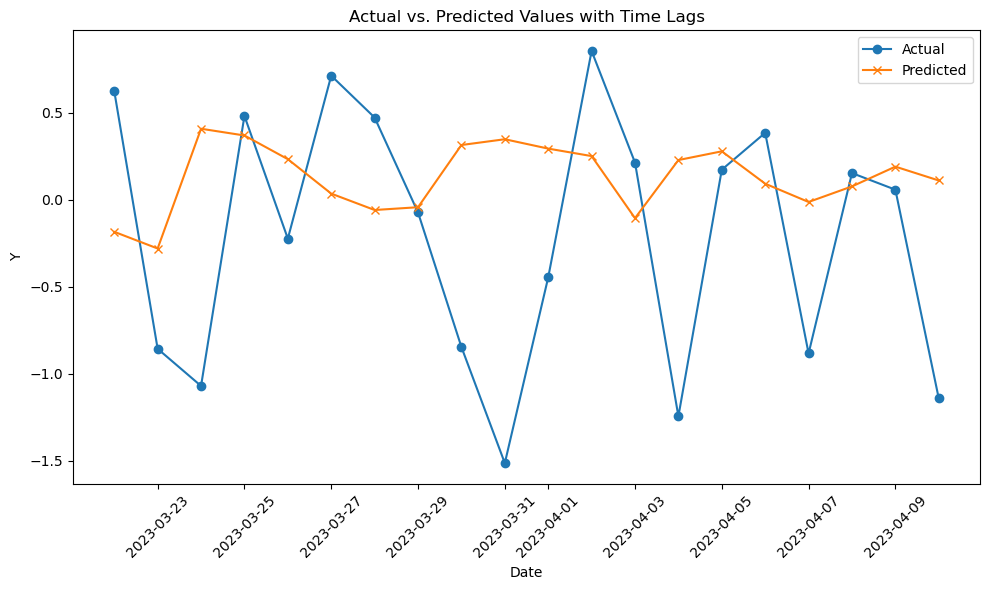

In [6]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='Actual', marker='o')
plt.plot(test_data['Date'], y_pred, label='Predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Values with Time Lags')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
